Emanuel Calderon, Algorithms 605.621

Copyright Johns Hopkins University.  Not for distribution online or by any other means.

# Statement of Academic Integrity

I, Emanuel Calderon, attempted to answer each question honestly and to the best of my abilities. I cited any and all help that I received in completing this assignment.

# Instructions to Students
This programming assignment is contained entirely in this IPython/Jupyter notebook. You are to read the problem from this notebook, and answer questions/make required modifications in this same notebook and submit it as a notebook.  Look for **BOLDFACE AND/OR ALL CAPS** for where to put answers to written questions.  Do not delete the problem statements, text, etc, leave all that as-is (makes grading easier).

# Overview

Implement two algorithms to return the closest pair of points in a Euclidean two-dimensional plane.  The first algorithm shall be a brute-force approach, with improvements, that runs no worse than $\theta(n^2)$ time, and the second algorithm will be a recursive divide-and-conquer method that runs in $O(n\log(n))$ time.  You'll kick the tires on both of these and analyze runtime performance and improvements.

## Tasks
Specifically, you must:

1. Write the algorithms, in correct pseudocode notation.  [This part may have been assigned on a previous or concurrent homework assignment.]
1. Implement both algorithms correctly, in this notebook. 
1. Compare/contrast algorithm performance via graphs.  In this one case, the performance is related to the number of calls to the distance method.
1. Discuss your experiences and opportunities to improve.

## Requirements
On the first algorithm, you must implement a brute-force method with *at least one improvement* over a very simple method.  The baseline is "for i in all points, for j in all points, call the distance function, yada yada" and you shall improve on that in at least one *asymptotically similar* way by cutting down the number of calls to the distance function.  More on that in the section down below.

On the second algorithm, you must implement it as the CLRS book describes in section 33.4 (and as you have fleshed out in the full realization of this algorithm; CLRS provides only a sketch).

You will plot a curve that shows the improvement of the second approach over the first.

## Constraints

The implementation is not collaborative.  While writing the algorithm may be a collaborative effort as indicated in one of the homework assignments, you must write your own code following the Programming Assignment Guidelines (Blackboard page Syllabus & Course Information ).  Pay careful attention to the academic integrity requirements regarding publicly available code.

Use the function signatures and any data structures as supplied$-$do not change function signatures or introduce strange calling conventions; the instructor's tests are written assuming these function signatures.  Further, beware of strange *side effects* that may cause bad behavior on subsequent runs of the code.  Be sure to "restart and run all" prior to submitting your notebook, as the instructor will do the same when testing.  Points will be deducted if the instructor has to make any changes in order to run your code.

The analysis and graphs must be driven with programmatically derived data, not "hard coded" or pasted in run counts.  An example of what **not** to do: xvals=[3, 4, 12, 15, 36, 47] /* hard coded */  Instead, xvals = [i for i in mycounts] where mycounts is an array updated through various trials you perform using your function(s).

As for notebook runtimes, the notebook must never exceed an execution time of FIVE WALL-CLOCK MINUTES.  If your notebook does not execute on a cloud service, such as Google Colaboratory, on the supplied instructor inputs within this time, points will be deducted.  It likely means there's a bug in your implementation.  If you have issues with this, reach out to your instructor.

# Closest Pairs (100 pts total)



## Preliminaries

Implement your algorithm in the Student Implementation block(s) and code to print your results. Your code must have a reasonable, consistent, style and commented documentation. It must have appropriate data structures and modularity. 

Your code must appear in this notebook (not as an external library).  You may create additional notebook cells as necessary.  If present, preserve the instructor input block, and do not change names of any of the instructor supplied variables or data structures - they will be used by the instructor when testing your code. Output must be clear and nicely formatted.

Your code should be robust and have some error checking - we won't deliberately test for unusual/nonsense conditions, but our tests will include different data than supplied here so you want to be prepared for a variety of (well-formed) input conditions.  

If present, the instructor test block will be used to test your code; if the test block runs correctly, then your code has the correct function signature, and performs well when running multiple trials.  (The instructor may change or add to the test cases during grading.)

## Instructor Data Structures and Helpers

These are data structures that will be used throughout your implementation.  Although strongly cautioned against this, you can make modifications, but if present, ensure that the instructor test block functions correctly without modifications.

In [1]:
############################################################################
# INSTRUCTOR DATA STRUCTURES
# If you change these, don't break the instructor test block.
############################################################################
# Decorator example for counting function calls, adapted from 
# https://stackoverflow.com/a/21717396/8542716
def call_counter(f):
    """
    Adds a ".calls" variable to the function that increments w/every call.
    Set it to zero between iterations.  
    Example:
        @call_counter
        def sumallbelow(x):
          if x<1:
            return 0
          return x + sumallbelow(x-1)
        
        ...
        sumallbelow.calls = 0 # reset before any use
        print(f"The sum up to 4 is: {sumallbelow(4)}")
        print(f"and the call counts are {sumallbelow.calls}")

    """
    def wrapped(*args, **kwargs): # deal with any/all arguments
        wrapped.calls += 1
        return f(*args, **kwargs) # call the real function here
    wrapped.calls = 0
    return wrapped

class debugprint(object):
  """
  A debug print decorator useful for tracing the flow of recursive functions.
  It adds a "debugprint" method to each function call, that increases the 
  number of spaces on each call before printing the output.

  To use, add @debugprint on top of your function.  Then, within your function
  foo, put foo.debugprint("whatever"), and it will print "whatever" with 
  several spaces in front of it.  Recursive calls add to the spaces.  Enable
  with "debugprint.enabled = True", and disable w/False.

  There's also a counter called ".calls," which you reset like the counter
  decorator above.  Note, enabling/disabling does not affect the counter; the
  counter is always counting.

  Example:
      @debugprint
      def fib(N):
        fib.debugprint(f"inside fib({N})")
        if N<2:
          fib.debugprint(f"returning {N}")
          return N
        fib.debugprint(f"returning fib({N-1}) + fib({N-2})")
        return fib(N-1) + fib(N-2)

      # toggle this on/off as needed
      fib.enabled, fib.calls = True, 0
      print(f"The 3rd Fibonacci number is {fib(3)}")
      print(f"Number of calls is {fib.calls}")

  Output:
      inside fib(3)
      returning fib(2) + fib(1)
        inside fib(2)
        returning fib(1) + fib(0)
          inside fib(1)
          returning 1
          inside fib(0)
          returning 0
        inside fib(1)
        returning 1
      The 3rd Fibonacci number is 2
      Number of calls is 5

  Adapted from https://stackoverflow.com/a/862915/
  Also adding a calls counter because I cannot combine decorators
  """
  calls = 0
  enabled = False
  space = ""
  def __init__(self, func):
    self.func = func
  def __call__(self, *args, **kwargs):
    if self.enabled:
      # print 'Entering', self.func.func_name 
      # print '    args:', args, kwargs
      pass
    self.space += "  "
    self.calls += 1
    result = self.func(*args, **kwargs)
    self.space = self.space[:-2]
    return result
  def debugprint(self, *args, **kwargs):
    if self.enabled:
      print(self.space+" ".join(map(str,args)), **kwargs)

class Point(object):
    """
    Data structure for points.  Methods include P.x, P.y and other Pythonisms
    necessary to use with sets, tuples, etc.
    """
    def __init__(self, x, y): 
        self.x = x 
        self.y = y
    def __repr__(self):
        return f"Point({self.x},{self.y})" 
    def __eq__(self, other): # need both eq and hash if you want to use sets
        return self.x == other.x and self.y == other.y
    def __hash__(self):
        return hash((self.x, self.y))
    def __iter__(self): # required to convert to tuple
        for i in [self.x, self.y]:
          yield i

## Brute Force Improved (45 pts)
Write code to print the closest pair of points, and their distance using the distance function.  Use a brute force technique, but with at least one asymptotically similar improvement that will speed up the operation.  

Return the number of calls to the distance function for each input data set.  Print out the closest pair of points, and their distance, and the number of calls to the distance function.

You must fix up the implementation of the distance function, which is currently incorrect.  Your brute force must call out to it, and return the counts of the number of times the distance function was called.

An *asymptotically similar* speedup is one that results in fewer calls to the dist function, but does not change the overall $n^2$ running time behavior.  Think of it as a quick fix.  It may change $\theta$ to $O$, and may change the constant $c$ in the definition $\theta(n) = c\cdot f(n)$, but it will not take the function to $n\log(n)$ or anything.  That's the point of the second implementation.  We need you to try at least one quick fix speedup.

There is a ``Point'' class data structure to use.  The inputs to both this and the CLRS function are Python arrays of Points.  Read the output block for the format and how to use the Points class.






### Brute Force Improved Implementation

In [2]:
############################################################################
# STUDENT IMPLEMENTATION BLOCK - Brute Force Improved
############################################################################
# Student Euclidean Distance Function
@call_counter  # adds calls attribute to functions
def dist(p1, p2):
    """
    Function to find the distance of the two pairs of points 
    Args:
        p1 (list): Points in x,y made by class structure
        p2 (list): Points in x,y made by class structure
    
    Returns:
        d (float): Returns distance of p1 and p2
    """  
    # stub implementation - you have to change - just here to demo return vals
    # seperating out math operations to avoid issues
    p12x = p1.x - p2.x #minus x distance
    p12y = p1.y - p2.y #minus y distance 
    
    squared_p12x = p12x**2 #square x 
    squared_p12y = p12y**2 #square y 
    
    # add the two differences and sqrt, turns to float
    d = (squared_p12x + squared_p12y)**(1/2) 
    return d #return distance

# Implementation of Student Closest Points algorithm
def closestPairBrute(points):  # Preserve the function name and arguments
    """
    This is the Brute Force Improved n^2 implementation to find the closest 
    distance between two points.  
    Args:
        points (list): Points in x and y, points is an array of Points
    
    Returns:
        mypoint1 (tuple): 1st point x,y
        mypoint2 (tuple): 2nd point x,y
        mydist (float): distance between mypoint1 and mypoint2  
        dist.calls (int): integer of calls to function
    """
    # statement to get the total input points 
    totalpoints = len(points)

    smallestvalue =float('inf')  # took this from ofice hours to set initial small value
    dist.calls=0                 # Remember to track the calls to dist
    
    # i is used to begin the run through points O(n)
    for i in range(totalpoints):
        # j is used with range look at points ahead of i hence "i+1" O(n^2)
        # this is a great improvment on algorithm as it does not 
        # run through the list of points more than once!! 
        for j in range(i+1, totalpoints):
            # obtains the distance using functions 
            mydist = dist(points[i], points[j])
            # print(str(points[i]) + " " + str(points[j]) + " " + str(mydist) + " " + str(smallestvalue) + " " + str(dist.calls))
            # print(" ")
            # compares the values of captured to current points
            # if new value is smaller, replace old value
            if mydist < smallestvalue:
                smallestvalue = mydist
                # below identifies points 
                mypoint1, mypoint2 = points[i], points[j]

    # reinsert smallest value to mydist
    mydist = smallestvalue
    # Return the closest 2 points, the Euclidean distance between them, 
    # and calls to the distance function.
    return mypoint1, mypoint2, mydist, dist.calls




### Brute Force Improved Output

In [3]:
############################################################################
# STUDENT OUTPUT BLOCK
############################################################################
# This block should run your function and produce output that matches the input 
# and output.

POINTS=[Point(1,2), \
        Point(4,3), \
        Point(9,8), \
        Point(9,2), \
        Point(8,2), \
        Point(4,5)]
dist.calls = 0 # reset before every run
p1, p2, d, c = closestPairBrute(POINTS)
print(f"Closest pair of points are {p1} and {p2}, distance = {d:.2f}")
print(f"Call counts on dist = {c}")

Closest pair of points are Point(9,2) and Point(8,2), distance = 1.00
Call counts on dist = 15


## CLRS Algorithm (15 pts)

Implement the closest pair of points described in the CLRS textbook, 3rd ed, in section 33.4.  Input and output will be as with the brute force method, but your implementation will run in $n\log(n)$ time.

For this problem, you will need to create additional functions, including at least one recursive function.  The function shown below, ``closestPairCLRS``, will act as a front-end, or "kickoff" function to the recursive function.  The kickoff function will perform preliminary setup and organization of input data as explained in CLRS, then it will call out to a recursive function (named whatever you like) that you will write, using your own function signature, to solve the problem efficiently.  

### CLRS Implementation

In [4]:
# STUDENT RECURSIVE FUNCTION GOES HERE
def SortedPoints(points):
    """
    This is the sorting function used to initially sort the points in x coordinate
    to find middle in reasonable way.  
    Args:
        points (list): Points in x and y, points is an array of Points
    
    Returns:
        points (list): oints sorted in x direction 
    """
    points = sorted(points, key=lambda k: k.x)

    return points




In [5]:
############################################################################
# STUDENT IMPLEMENTATION BLOCK - CLRS
############################################################################
# Implementation of Student Closest Points algorithm
def closestPairCLRS(points):  # Preserve the function name and arguments
    """
    This is the Recursive approach Improvement n*lgn implementation to find the closest 
    distance between two points.  
    Args:
        points (list): Points in x and y, points is an array of Points
    
    Returns:
        mypoint1 (tuple): 1st point x,y
        mypoint2 (tuple): 2nd point x,y
        mydist (float): distance between mypoint1 and mypoint2  
        dist.calls (int): integer of calls to function
    """
    # transfers the sorted points of the sorted function into this function
    points = SortedPoints(points)
    # length of the points in the list
    totalpoints = len(points)   

    # base case, run brute force if less than 3 points 
    if totalpoints <= 3:
        return closestPairBrute(points)
    
    # Divide 
    split = totalpoints // 2

    #identifying midpoint of the total points 
    midpoint = points[split]

    # splitting points left and right creating those planes
    pointsleft = points[:split]
    pointsright = points[split:]

    # recursive nature to find distance of point left and
    # right
    mindistleft = closestPairCLRS(pointsleft)
    mindistright = closestPairCLRS(pointsright)

    # sets up the first  close distance points whether left
    # or right side
    if  mindistleft[2] <= mindistright[2]:
        mypoint1 = mindistleft[0]
        mypoint2 = mindistleft[1]
        mydist = mindistleft[2]

    else:
        mypoint1 = mindistright[0]
        mypoint2 = mindistright[1]
        mydist = mindistright[2]

    # finds the minimum values
    delta = min(mindistleft[2],mindistright[2])
    
    #creates the 2 delta space plane
    twodelta = 2*delta 


    # combine, starts the strip pplane
    strippoints = []
    resultpoints = pointsleft + pointsright

    # sets up the plane and appends to created strip
    for i in range(totalpoints):
        # fetches the points within 2*delta parameter
        if abs(resultpoints[i].x - midpoint.x) < twodelta:
            strippoints.append(resultpoints[i])
        
    # now sorts in the y direction so we can check the delta
    # moving up up to 7 delta distance 
    strippoints = sorted(strippoints, key=lambda k: k.y)

    # place holder for the smallest delta
    smallestvalue = delta

    # size of the points within the created plane
    stripsize = len(strippoints)
    
    # now will be looking through the plane in the y direction
    # below is similar loops we did in bruteforce
    for i in range(stripsize):
        # making sure next point is picked to compare
        j = i + 1
        # j will be less than 7, below algorithm aims to do so. runs as long as j
        # is smaller than the stripsize and if y is smaller than smallest value
        # if y is not smaller than smallest value, there is no way it should be 
        # considered, eliminating work on computer.
        while j < stripsize \
            and abs(strippoints[j].y - strippoints[i].y) < smallestvalue:
            
            # gets the new delta
            delta = dist(strippoints[i], strippoints[j])
            
            # checks to see if smaller than original
            # if so, replace it
            if delta < smallestvalue:
                smallestvalue = delta
                mypoint1, mypoint2 = strippoints[i], strippoints[j]
                mydist = smallestvalue
            j += 1

    # Return the closest 2 points, the Euclidean distance between them, 
    # and calls to the distance function.
    return mypoint1, mypoint2, mydist, dist.calls

### CLRS Output

In [6]:
############################################################################
# STUDENT OUTPUT BLOCK
############################################################################
# This block should run your function and produce output that matches the input 
# and output.

POINTS=[Point(1,2), \
        Point(4,3), \
        Point(9,8), \
        Point(9,2), \
        Point(8,2), \
        Point(4,4)]

# POINTS = [Point(1,0), Point(15,19), Point(10,13), Point(1,18), Point(18,4)]

# POINTS = [Point(20,13), Point(17,4), Point(16,9), Point(0,4), Point(8,0), Point(14,20), Point(3,9), Point(4,17)]

dist.calls = 0 # reset before every run
p1, p2, d, c = closestPairCLRS(POINTS)
print(f"Closest pair of points are {p1} and {p2}, distance = {d:.2f}")
print(f"Call counts on dist = {c}")

dist.calls = 0
p1, p2, d, c = closestPairBrute(POINTS)
print(f"Compare to Brute which says {p1}, {p2}, {d} and {c} calls.")

Closest pair of points are Point(4,3) and Point(4,4), distance = 1.00
Call counts on dist = 4
Compare to Brute which says Point(4,3), Point(4,4), 1.0 and 15 calls.


## Instructor Test Block
Notebooks may have a test block, like this, that the instructor will run to evaluate the correctness of your outputs. 
Ensure your implementation passes this initial test.  The instructor will replace the inputs, and may replace the code, but for now, you should make sure this block runs, passes tests, and does not throw exceptions.

In [7]:
# INSTRUCTOR TEST BLOCK
from math import log2
asPoints = lambda A: [Point(a,b) for a,b in A]


def myassert(case, cond):
    if not cond:
        print(f"FAILED CASE, case={case}")

def myTest(func, inp, ans, cnt=0):
  """
  case is array of points, 
  ans is tuple of ((p1, p2), dist), 
  cnt is max expected calls
  """
  myTest.count += 1
  try:
      dist.calls=0
      tup = func([p for p in asPoints(inp)]) # p1, p2, dist, calls
      p1, p2, d, dc = tup
      print(f"case {myTest.count:<2d} gives {p1}, {p2} dist {d:0.2f} in {dc} calls (max = {cnt:0.2f})", end=' ')
  except Exception as e:
      print(" ")
      print("======== EXCEPTION ======== EXCEPTION ======== EXCEPTION")
      print("========",e)
  passed = True
  apts=asPoints(ans[1:])
  adst=ans[0]
  a1, a2 = apts
  passed &= set([p1,p2])==set([a1, a2])  # order not matters
  passed &= abs(adst-d) < 0.00001
  passed &= (not cnt or dc<=cnt)   # cnt implies we expect no more than count
  if passed:
    print(" ... passed")
    myTest.passed += 1
  else:
    print(" !!! failed !!!")
    print(f"FAILED CASE {myTest.count:02d}")
    xtup=(d, (p1.x, p1.y), (p2.x, p2.y))
    print(f"   expected {adst}, {a1}, {a2}, got {xtup} and {dc} calls")

closestPairBrute.ncalls = lambda n: n*(n-1)/2  # you can just add variables to funcs
closestPairCLRS.ncalls = lambda n: n*log2(n)
for func in [closestPairBrute, closestPairCLRS]:
  print(f"TESTING CASE {func.__name__} ----")
  myTest.count = 0
  myTest.passed = 0

  # Tests
  POINTS=[(1,1), (2,1)]
  ans=(1.0, (1,1), (2,1))
  myTest(func, POINTS, ans, func.ncalls(len(POINTS))) # last arg is max number of calls

  POINTS = [(1,0), (15,19), (10,13), (1,18), (18,4)]
  ans = (7.810249675906654, (15, 19), (10, 13))
  myTest(func, POINTS, ans, func.ncalls(len(POINTS)))

  POINTS = [(20,13), (17,4), (16,9), (0,4), (8,0), (14,20), (3,9), (4,17)]
  ans = (5.0990195135927845, (17,4), (16,9))
  myTest(func, POINTS, ans, func.ncalls(len(POINTS)))

  POINTS = [(5,8), (3,6), (15,3), (3,17), (1,7), (2,0), (4,18), (4,0), (6,3)]
  ans = (1.4142135623730951, (3,17), (4,18))
  myTest(func, POINTS, ans, func.ncalls(len(POINTS)))

  POINTS= [(3, 19), (4, 13), (0, 5), (18, 8), (7, 5), (12, 8), (10, 17), (19, 17), (13, 4)]
  ans=(4.123105625617661, (12, 8), (13, 4)) # CLRS calls = 13
  myTest(func, POINTS, ans, func.ncalls(len(POINTS)))

  print(f"---- PASSED {myTest.passed} of {myTest.count} cases")

TESTING CASE closestPairBrute ----
case 1  gives Point(1,1), Point(2,1) dist 1.00 in 1 calls (max = 1.00)  ... passed
case 2  gives Point(15,19), Point(10,13) dist 7.81 in 10 calls (max = 10.00)  ... passed
case 3  gives Point(17,4), Point(16,9) dist 5.10 in 28 calls (max = 28.00)  ... passed
case 4  gives Point(3,17), Point(4,18) dist 1.41 in 36 calls (max = 36.00)  ... passed
case 5  gives Point(12,8), Point(13,4) dist 4.12 in 36 calls (max = 36.00)  ... passed
---- PASSED 5 of 5 cases
TESTING CASE closestPairCLRS ----
case 1  gives Point(1,1), Point(2,1) dist 1.00 in 1 calls (max = 2.00)  ... passed
case 2  gives Point(10,13), Point(15,19) dist 7.81 in 7 calls (max = 11.61)  ... passed
case 3  gives Point(17,4), Point(16,9) dist 5.10 in 8 calls (max = 24.00)  ... passed
case 4  gives Point(3,17), Point(4,18) dist 1.41 in 10 calls (max = 28.53)  ... passed
case 5  gives Point(13,4), Point(12,8) dist 4.12 in 15 calls (max = 28.53)  ... passed
---- PASSED 5 of 5 cases


## Analysis (30 pts)
Perform tests to compare the asymptotic behavior of the Brute Force Improved method to the CLRS method.

<font color='red'>Note, if you were not able to get the CLRS method working reliably, you must still plot the performance of the Brute Force Improved.  If this is the case, please say specifically that you could not get CLRS to run (at all, reliably, etc.).</font>
 
As with every programming assignment this semester, *running time* implies execution steps, not clock time, versus size of the input data.  Use the counts of the ``dist()`` function as collected above, and plot over various trial cases using the graph below.  (You may use this graph code for future assignments, or you can put in your own, as long as it is reasonable.)

Think: what goes on the x axis?  What goes on the y axis?  How do you modify your code above to exercise the different inputs?  Label the axes, use the right data, make this look *professional.*  Also, pay attention to the asymptotic bounds.  Compare simple to improved on the same graph.

***Then, write a description below the figure of what is happening.***

Please note, graphs must tell a story.  The better your graph is, the more descriptive, (appropriate scale to "zoom in" on the required features), the better the story it tells.  Use colors, points, symbols, a good key, good labels, make this look professional.  If you are comparing two alternatives, find a way to overlay their runs on a single graph.  Really, really try to sell me graphically on your improvements.

Things to consider:
* How many points do you plot?  Notice there are too many red x's.
* Which bounding functions do you include?  Not all of them.  Can you "bring them in a little" to make them tighter to your function?

You may reuse this plot style on future assignments, or augment it as you wish.  Tell us a good story!  **Don't forget the writeup.**



### Data Collection
Run repeated tests over input sizes N to collect data for your plot.  Then, modify the code in the Plot section to display these run counts.

In [8]:
# STUDENT DATA & TEST COLLECTION CELL
#
# FILL THIS OUT WITH CODE TO RUN YOUR FUNCTIONS OVER MULTIPLE SIZES OF INPUTS.
# YOU MAY REUSE CODE FROM ABOVE, INCLUDING ANY SUPPLIED INSTRUCTOR CODE, TO
# GENERATE THE CASES.
#
# AS WITH ANY CODE YOU WRITE, USE GOOD COMMENTS.
import random # bringing in ramdomization 
import math   # bringing in function for ceiling 

# inputs
tests = 101       # trials i want to perform to ensure algorithm functionality
numPoints = tests # same points to include in the plots
pointrange = 500  # range of int values of points up to 500

# initialize 
POINTS = []         # same points set up
mybrutecounts = []  # created for call counts brute
myCLRScounts = []   # created for call counts D n C 
myTest.passed = 0   # used for the testing 
myTest.count = 0    # used for counting the cases of tests

# loop to check both each case of tests and 
for i in range(tests):
    randx = math.ceil(random.random() * pointrange)
    randy = math.ceil(random.random() * pointrange)
    POINTS.append(Point(randx, randy))

    if i >= 1:
        # print("i ran")
        # print("POINTS 100")
        # print(POINTS)
        # below same call outs seen in the given outputs in our algorithm
        # Brute force below
        dist.calls = 0
        p1_BF, p2_BF, d_BF, c_BF = closestPairBrute(POINTS)
        ans = (d_BF, p1_BF, p2_BF)      #using answers from brute force to verify D n C 
        # below we starte the appending to use in plots y call counts, x sixe of points
        if i >= 3:
            mybrutecounts.append(dist.calls)
        # below same call outs seen in the given outputs in our algorithm
        # CLRS below
        dist.calls = 0
        p1_DNC, p2_DNC, d_DNC, c_DNC = closestPairCLRS(POINTS)
        # below we starte the appending to use in plots y call counts, x sixe of points
        if i >= 3:
            myCLRScounts.append(dist.calls)
        # print("values")
        # print(ans)
        # runs the test
        myTest(closestPairCLRS, POINTS, ans, closestPairCLRS.ncalls(len(POINTS)))
    
    
# WRITE EXPERIMENT CODE HERE, THEN 
# SET THIS VARIABLE BELOW TO REFLECT YOUR RUN COUNTS.
# Then edit the plot code in the next block to make it clear, add labels, etc.
# INCLUDE ENOUGH TRIALS.  HINT, 10 IS NOT "ENOUGH" FOR CLOSEST POINTS.
# mybrutecounts = [0.8*x**1.9 for x in range(50)] # this is just a stub
# myCLRScounts = [0.7*x**1.8 for x in range(50)] # this is just a stub

print(f"---- PASSED {myTest.passed} of {myTest.count} cases")
        
# THIS IS GREAT! 98 of 100 cases i used passed.
    

case 1  gives Point(225,405), Point(309,200) dist 221.54 in 1 calls (max = 2.00)  ... passed
case 2  gives Point(309,200), Point(333,4) dist 197.46 in 3 calls (max = 4.75)  ... passed
case 3  gives Point(225,405), Point(298,456) dist 89.05 in 2 calls (max = 8.00)  ... passed
case 4  gives Point(225,405), Point(298,456) dist 89.05 in 6 calls (max = 11.61)  ... passed
case 5  gives Point(346,410), Point(298,456) dist 66.48 in 6 calls (max = 15.51)  ... passed
case 6  gives Point(298,456), Point(283,488) dist 35.34 in 7 calls (max = 19.65)  ... passed
case 7  gives Point(283,488), Point(298,456) dist 35.34 in 5 calls (max = 24.00)  ... passed
case 8  gives Point(298,456), Point(283,488) dist 35.34 in 13 calls (max = 28.53)  ... passed
case 9  gives Point(283,488), Point(298,456) dist 35.34 in 7 calls (max = 33.22)  ... passed
case 10 gives Point(298,456), Point(283,488) dist 35.34 in 14 calls (max = 38.05)  ... passed
case 11 gives Point(298,456), Point(283,488) dist 35.34 in 13 calls (ma

### Plot
Make adjustments to the code below.  Plots must tell a story; show that Brute Force approximates one well known distribution, and CLRS another.

C:\Users\Emanuel\AppData\Local\Temp\ipykernel_15792\1659411433.py:41: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='major', axis='both')


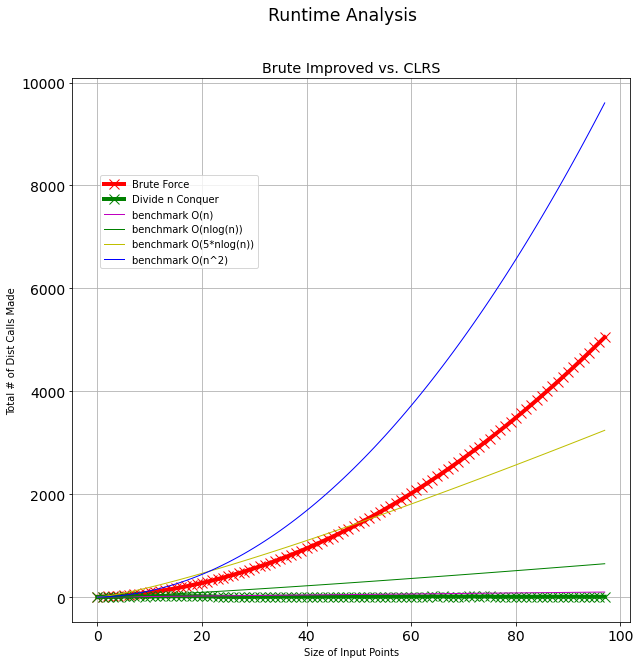

In [9]:
# Code adapted from Sahil Sharma, used with permission, from Spring, 2021

from math import pow
from math import log2
from math import factorial

# REQUIRES mybrutecounts, myCLRScounts set above
N=len(mybrutecounts)

# benchmark data set generation
yTestVals1 = [0,] # linear for O(n)
yTestVals2 = [0,] # quadratic for O(n^2)
yTestVals3 = [0,] # n*log(n) for O(nlog(n))
yTestVals4 = [0,] # 5*n*log(n) for O(nlog(n))

# generate bench mark data for O(n), O(n^2), O(nlog(n)), O(10*nlog(n)), and O(n!)
for i in range(2, N+1):
    # UPDATE THE COEFFICIENTS TO THESE FUNCTIONS TO BRING SOME IN "TIGHT" TO
    # THE BRUTE FORCE, and some to the CLRS, or add others.
    yTestVals1.append(i)
    yTestVals2.append(pow(i, 2))
    yTestVals3.append(i*log2(i))
    yTestVals4.append(5*i*log2(i))

# %matplotlib inline
import matplotlib.pyplot as plt

# Brute vs. CLRS execution steps
plt.rcParams['figure.figsize'] = [10,10]
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle('Runtime Analysis', size="xx-large")

# plotting nearest neighbor execution steps
ax1.set_title('Brute Improved vs. CLRS', size="x-large")
ax1.plot(range(N), mybrutecounts, "rx-", markersize=10, linewidth=4, label="Brute Force")
ax1.plot(range(N), myCLRScounts, "gx-", markersize=10, linewidth=4, label="Divide n Conquer")
ax1.plot(range(N), yTestVals1, "m^-", markersize=0, linewidth=1, label="benchmark O(n)")
ax1.plot(range(N), yTestVals3, "g^-", markersize=0, linewidth=1, label="benchmark O(nlog(n))")
ax1.plot(range(N), yTestVals4, "y^-", markersize=0, linewidth=1, label="benchmark O(5*nlog(n))")
ax1.plot(range(N), yTestVals2, "b^-", markersize=0, linewidth=1, label="benchmark O(n^2)")
ax1.grid(b=True, which='major', axis='both')
ax1.set(xlabel = 'Size of Input Points', ylabel = 'Total # of Dist Calls Made')
ax1.legend(loc=(0.05,0.65), scatterpoints=1)
ax1.tick_params(axis="both", which="major", labelsize=14)

### Analysis Writeup

As seen above, we make a couple distinctions:
1. the brute force runs closer to the O(n^2) benchmark line
    - the reason it is lower is due to the optimizations performed post retrospect of the original two loops which
      include making sure we dont go over same points we used before calling dist() again
    - I am glad my algorithm runs lower than O(n^2). there are definetely more room for improvements that could make the 
      run lower, examples include not using math function and squaring with variables instead of "**2" and making the square 
      feature as its own funciton.
    - it makes sense as the points get larger that the brute force calls increase. We continue to start at what ever points 
      given and run through
2. Divide and conquer (D n C) beats brute force in work performed 
    - evident from the graph and total calls that the D n C is the way to go here, especially on the sample points I inputed 
      on how long the calls took to make compared to the brute force
3. D n C runs below the benchmark nlgn
    - Visually seeing, it is quite surprising how well the divide and conquer works, such that I struggle to believe what I
      am seeing here. I was thinking the DnC would at the least be closer to nlgn but that seems to not be the case
    - something I happen to notcie and should have pulled another graph bounded at a certain area, is that the data has a bit 
      of a bell curve in cases 8->22 and then diminishes in calls. Am wondering what triggered that.
      

## Retrospection (10 pts)
Talk about how you did on this assignment.  This is just feedback to the instructor.  You can edit this cell and answer inline in non-bold.  Please go into some detail.
* **What was the last bug you found and fixed?** So, although the tests passed with flying colors there were still some bugs i found that needed to be fixed and some redundant lines I had that could be removed for less computational work. This inclodes the "and" statment on the vertical check performed on the points. Originally I had a statement that said to ignore when the y values minus to 0 I.E. (1,5) & (10,5). I used to have a statement to not include the ones that equate to 0 which you can see from the points how that would cause a problem. This was the last removal which caused some issues on the closest points in the x direction. I hope that fixed that and the tests to 100 points seem to prove that. 
* **What are some late-breaking ideas you had for improving your implementation, that maybe you didn't have time to implement?** I did recieve another way of checking point close distant without using the equation, rather "Manhattan Distance" which with more time would have loved to incorporated and see how much better that works. I believe that consistently testing would pull out more bugs that I would be able to fix. Possibly highlight some more ways to rearrange my algorithm to destress the areas of big concerns.
I just reread some of the instructions. My thought was at first to get the program running no matter how. It seems I was to create a funciton to apply the recursive nature and I see that in my current recursion, I sort the points consistently. meaning there is some redundancy to some of the function call names. This should be changed to avoid redundancy.
* **What did you feel you learned from this assignment?** The videos on the assignment helped alot! It was a good starting point but at some point I just looked at the code and what was printing out and something just clicked that helped me understand what exactly the algorithm was doing and why. It clicked more on the recursion portion. Other learned abilities were the foresight of future use of the functions I built earlier in brute force to utilize in recursion portion.  
* **How would you improve this assignment for future semesters?** The videos in my citation were a monumental help. Please feel free to share. It has pseudocode so it is not like they are giving you the code but it really helped understand what is going on and why you would do 2*delta. I found myself looking at it and then just testing things out to see how it worked. Maybe also asking for more plots too. I noticed a little bit late that the nlgn of the D n C actually had a bit of a bell curve and then reduced and am wondering why it did that.

If there's anything else you'd like to say, feel free to write it.

I am glad I hopped on performing this work early on. Took me two full days to get it all together (brute force and C n C) not counting the plot and data collection portion. 


# Citations
Nathanson, S. (2022, 3 12). O(nlog(n)) Nearest Points Algorithm - Visualization and Explanation. 
    Retrieved from youtube: https://www.youtube.com/watch?v=-RWvTzJlE_I
Qi, L. (2022, 3 12). Closest Pair of Points (Divide and Conquer) Explained. 
    Retrieved from youtube: https://www.youtube.com/watch?v=6u_hWxbOc7E&ab_channel=LingQi


# Submission Reminders

Submit to Blackboard per instructions found on Blackboard.  In most cases, you just upload your ipynb file.  Before you do that, 


* "restart and run all" before submitting.  Make sure it runs and does not throw exceptions, even if it does not pass all the test cases.  The grader "restarts and runs all" and expects it to run completely through.  We have graded many assignments where the student has done only a partial run, or run things out of order, leaving around old variables that give false results, only to have it throw an exception or give a different answer when the grader runs it.

* Rerun your code blocks, make sure you get the same answer each time.  The instructor's test block makes repeated calls to your code, and if you've left a stray variable that doesn't get cleared, it could affect the results.  

* Make sure you've completed every task in this notebook.

* If there's a plot required, make sure it's legible, axes correctly labeled, and that it "tells a story" about what is being shown.

* Double check that you have not changed the function signature.

* Include a statement of academic integrity in the block at the top.  

* Put your name at the top.